# Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task:
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

#Importing Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

#Uploading Datasets

In [ ]:
drive.mount("datasets")

Mounted at datasets


In [288]:
Data=pd.read_csv("/content/datasets/MyDrive/PIAIC datasets/CarPrice_Assignment.csv")

#### Displaying Datasets

In [289]:
Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Preprocessing Datasets

* Checking categorical data

In [290]:
Categorical_columns=Data.select_dtypes("object").columns
Categorical_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

* Checking numerical data

In [291]:
Numerical_columns=Data.select_dtypes("number").columns
Numerical_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### One hot encoding

* Data manipulation is important process for the deep learning, machine learning , it converts the categorical data into the numerical data. It is also known as one hot encoding but in this hot encoding is not recommended because it creates more features which make our model undergo undefitting. Converting the lingusitic variables to assigned numbers

In [292]:
for i in list(Categorical_columns):
  print(f"The linguistic variables of the feature {i} is ")
  check=Data[i].value_counts()
  print(check)

The linguistic variables of the feature CarName is 
toyota corolla                    6
toyota corona                     6
peugeot 504                       6
subaru dl                         4
mazda 626                         3
                                 ..
alfa-romero stelvio               1
plymouth satellite custom (sw)    1
dodge dart custom                 1
nissan fuga                       1
buick opel isuzu deluxe           1
Name: CarName, Length: 147, dtype: int64
The linguistic variables of the feature fueltype is 
gas       185
diesel     20
Name: fueltype, dtype: int64
The linguistic variables of the feature aspiration is 
std      168
turbo     37
Name: aspiration, dtype: int64
The linguistic variables of the feature doornumber is 
four    115
two      90
Name: doornumber, dtype: int64
The linguistic variables of the feature carbody is 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
The lingu

In [293]:
Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [294]:
dict_1={"gas":0,
        "diesel":1}
Data["fueltype"]=Data["fueltype"].map(dict_1)

In [295]:
dict_2={"std":0,
        "turbo":1}
Data["aspiration"]=Data["aspiration"].map(dict_2)

In [296]:
dict_3={"four":0,
        "two":1}
Data["doornumber"]=Data["doornumber"].map(dict_3)

In [297]:
dict_4={"sedan":0
,"hatchback" :     1
,"wagon"     :     2
,"hardtop"  :     3
,"convertible" :    4}
Data["carbody"]=Data["carbody"].map(dict_4)

In [298]:
dict_5={"front" :  0
,"rear" : 1} 
Data["enginelocation"]=Data["enginelocation"].map(dict_5)

In [303]:
dict_6={"fwd" :   0
,"rwd" :   1
,"4wd" :    2}
Data["drivewheel"]=Data["drivewheel"].map(dict_6)

In [299]:
dict_7={"ohc": 0
,"ohcf":1
,"ohcv":2
,"l":3
,"dohc":4
,"rotor":5
,"dohcv":6}
Data["enginetype"]=Data["enginetype"].map(dict_7)

In [300]:
dict_8={"four"  :   0
,"six"      : 1
,"five"    : 2
,"eight"    : 3
,"two"        :4
,"three"     : 5
,"twelve"   : 6}
Data["cylindernumber"]=Data["cylindernumber"].map(dict_8)

In [301]:
dict_9={"mpfi"  :  0
,"2bbl"  : 1
,"idi"    : 2
,"1bbl"   : 3
,"spdi" :  4
,"4bbl"  : 5
,"spfi"  :  6
,"mfi"    : 7}
Data["fuelsystem"]=Data["fuelsystem"].map(dict_9)

In [304]:
Data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,171.2,65.5,52.4,2823,2,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,176.6,66.2,54.3,2337,0,0,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,176.6,66.4,54.3,2824,0,2,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,0,0,1,0,109.1,188.8,68.9,55.5,2952,0,0,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,0,0,1,0,109.1,188.8,68.8,55.5,3049,0,0,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,0,0,1,0,109.1,188.8,68.9,55.5,3012,2,1,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,0,0,1,0,109.1,188.8,68.9,55.5,3217,0,1,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [305]:
Data=Data.drop(columns=["car_ID","CarName"])

In [306]:
Data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,1,1,0,94.5,171.2,65.5,52.4,2823,2,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,0,0,0,99.8,176.6,66.2,54.3,2337,0,0,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,0,2,0,99.4,176.6,66.4,54.3,2824,0,2,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


###checking missing data

In [307]:
Data.isnull().sum().sum()

0

#Standardization

In [378]:
from sklearn.preprocessing import MinMaxScaler

In [379]:
scaler=MinMaxScaler()
scaler.fit(Data)
Scaled_Data=scaler.transform(Data)
Scaled_Data=pd.DataFrame(Scaled_Data,columns=Data.columns)
Scaled_Data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.0,0.0,1.0,1.00,0.5,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.666667,0.000000,0.260377,0.000000,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,0.0,0.0,1.0,1.00,0.5,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.666667,0.000000,0.260377,0.000000,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,0.0,0.0,1.0,0.25,0.5,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.333333,0.166667,0.343396,0.000000,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,0.0,0.0,0.0,0.00,0.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.000000,0.000000,0.181132,0.000000,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,0.0,0.0,0.0,0.00,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.000000,0.333333,0.283019,0.000000,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.0,0.0,0.0,0.00,0.5,0.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.000000,0.000000,0.301887,0.000000,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.2,0.0,1.0,0.0,0.00,0.5,0.0,0.655977,0.711940,0.708333,0.641667,0.605508,0.000000,0.000000,0.301887,0.000000,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.2,0.0,0.0,0.0,0.00,0.5,0.0,0.655977,0.711940,0.716667,0.641667,0.591156,0.333333,0.166667,0.422642,0.000000,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.2,1.0,1.0,0.0,0.00,0.5,0.0,0.655977,0.711940,0.716667,0.641667,0.670675,0.000000,0.166667,0.316981,0.285714,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


# Selecting features and target variables

In [380]:
X=Scaled_Data.drop(columns="price")
X=X.astype("float32")

In [381]:
Y=Scaled_Data["price"]
Y=Y.astype("float32")

#Splitting Datasets into the training sets and testing sets

In [382]:
from sklearn.model_selection  import train_test_split 

In [383]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,random_state=45)

#MODEL

In [434]:
from tensorflow.keras import models as M
from tensorflow.keras import layers as L
from tensorflow.keras.regularizers import L2

In [484]:
network = M.Sequential()
network.add(L.Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
network.add(L.Dense(8, activation='relu',kernel_regularizer="L2"))
network.add(L.Dense(6,activation="relu"))
network.add(L.Dense(1,activation="sigmoid"))
epoch=100
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
network.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_84 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 7         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [485]:
history=network.fit(X_train,Y_train,epochs= epoch,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 0.1925 - mae: 0.2841 - val_loss: 0.1882 - val_mae: 0.2802
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1774 - mae: 0.2631 - val_loss: 0.1801 - val_mae: 0.2706
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1693 - mae: 0.2491 - val_loss: 0.1736 - val_mae: 0.2630
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1705 - mae: 0.2572 - val_loss: 0.1676 - val_mae: 0.2558
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1588 - mae: 0.2343 - val_loss: 0.1628 - val_mae: 0.2499
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1565 - mae: 0.2335 - val_loss: 0.1578 - val_mae: 0.2433
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1561 - mae: 0.2332 - val_loss: 0.1533 - val_mae: 0.2366
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1499 - mae: 0.2

In [486]:
val_loss=history.history["val_loss"]
train_loss=history.history["loss"]

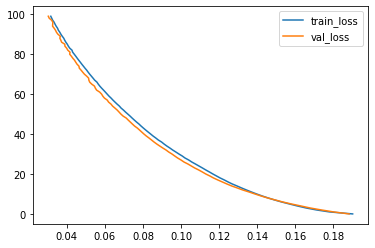

In [487]:
plt.plot(train_loss,range(epoch))
plt.plot(val_loss,range(epoch))

plt.legend(["train_loss","val_loss"])

In [488]:
test_mse_score, test_mae_score = network.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0326 - mae: 0.0833


In [489]:
predictions=[]
pred=network.predict(X_test)
for i in pred:
  predictions.append((i))

In [490]:
Actual=Y_test

In [491]:
Value=pd.DataFrame({"Actual":Actual,"Predicted":predictions})

In [492]:
Value

,Actual,Predicted
148,0.071868,[0.26553524]
64,0.152103,[0.13737535]
170,0.150961,[0.1704371]
72,0.743210,[0.42929065]
25,0.039075,[0.11317161]
...,...,...
174,0.138523,[0.14561504]
48,0.755474,[0.5045102]
168,0.112234,[0.16571677]
19,0.029219,[0.09120992]
